
# Storm Impact Prediction and Risk Analysis

## Objective
This project aims to analyze storm data to identify patterns, assess risk factors, and prepare the dataset for potential machine learning tasks such as storm severity classification or impact prediction.


In [94]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [95]:

# 2. Load the Dataset
df = pd.read_csv("storms.csv")
df.head()


,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,AL011975,1975,6,24,12,32.5,-52.0,tropical depression,NaN,20,-999,-1998,-1998
1,AL011975,1975,6,24,18,32.6,-52.6,tropical depression,NaN,25,-999,-1998,-1998
2,AL011975,1975,6,25,0,32.7,-53.2,tropical depression,NaN,25,-999,-1998,-1998
3,AL011975,1975,6,25,60,32.8,-53.2,tropical depression,NaN,25,-999,-1998,-1998
4,AL011975,1975,6,25,12,33.0,-54.5,tropical depression,NaN,25,-999,-1998,-1998


In [96]:

# 3. Explore the Dataset

# Basic Information
print("=== Dataset Information ===")
print(df.info())

# Statistical Summary
print("\n=== Dataset Description ===")
print(df.describe())

# Missing Values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22705 entries, 0 to 22704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          22705 non-null  object 
 1   year                          22705 non-null  int64  
 2   month                         22705 non-null  int64  
 3   day                           22705 non-null  int64  
 4   hour                          22705 non-null  int64  
 5   lat                           22705 non-null  float64
 6   long                          22705 non-null  float64
 7   status                        22705 non-null  object 
 8   category                      5162 non-null   float64
 9   wind                          22705 non-null  int64  
 10  pressure                      22705 non-null  int64  
 11  tropicalstorm_force_diameter  22705 non-null  int64  
 12  hurricane_force_diameter      22

In [97]:
# Replace negative placeholder values across the entire DataFrame
df.replace([-999, -1998], np.nan, inplace=True)

# Fill missing values in the 'category' column
df['category'] = df['category'].fillna('Not Applicable')

# Now, let's check the missing values again to confirm our changes
print("\n=== Missing Values After Cleaning ===")
print(df.isnull().sum())


=== Missing Values After Cleaning ===
name                                0
year                                0
month                               0
day                                 0
hour                                0
lat                                 0
long                                0
status                              0
category                            0
wind                                0
pressure                         1918
tropicalstorm_force_diameter    11439
hurricane_force_diameter        11439
dtype: int64


In [98]:
# Set up the plots
plt.figure(figsize=(18, 6))


<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0, 0.5, 'Count')

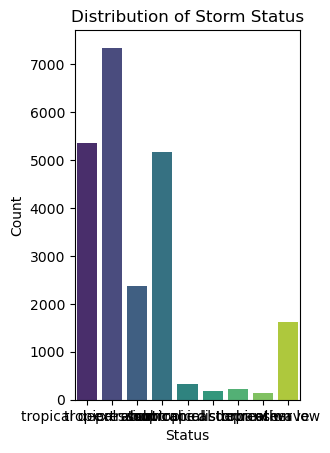

In [99]:
# Subplot 1: Distribution of Storm Status
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st subplot)
sns.countplot(x='status', data=df, palette='viridis', hue='status', legend=False)
plt.title('Distribution of Storm Status')
plt.xlabel('Status')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

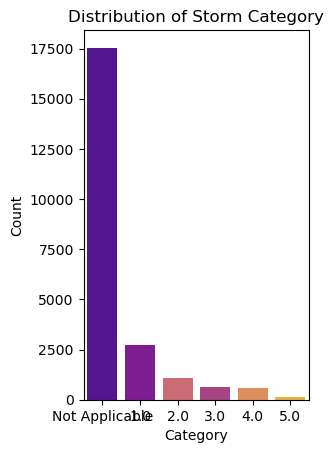

In [100]:
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd subplot)
sns.countplot(x='category', data=df, palette='plasma', order = df['category'].value_counts().index, hue='category', legend=False)
plt.title('Distribution of Storm Category')
plt.xlabel('Category')
plt.ylabel('Count')

In [101]:
plt.tight_layout() # Adjusts plot to prevent overlap
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Frequency')

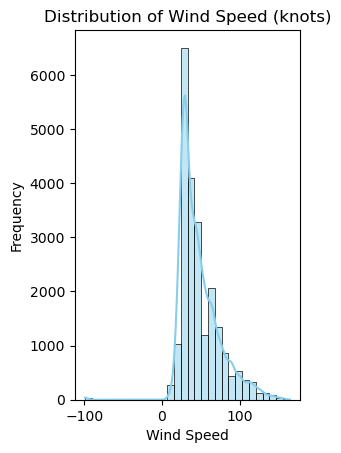

In [102]:
plt.subplot(1, 2, 1)
sns.histplot(df['wind'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Wind Speed (knots)')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

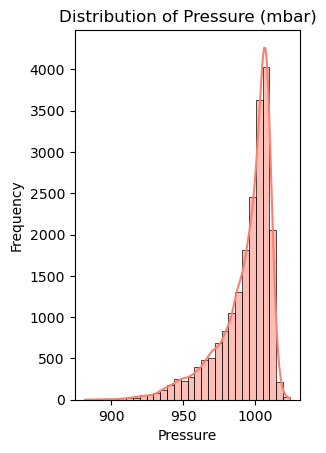

In [103]:
# Subplot 2: Distribution of Pressure
plt.subplot(1, 2, 2)
sns.histplot(df['pressure'], kde=True, color='salmon', bins=30)
plt.title('Distribution of Pressure (mbar)')
plt.xlabel('Pressure')
plt.ylabel('Frequency')



In [104]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

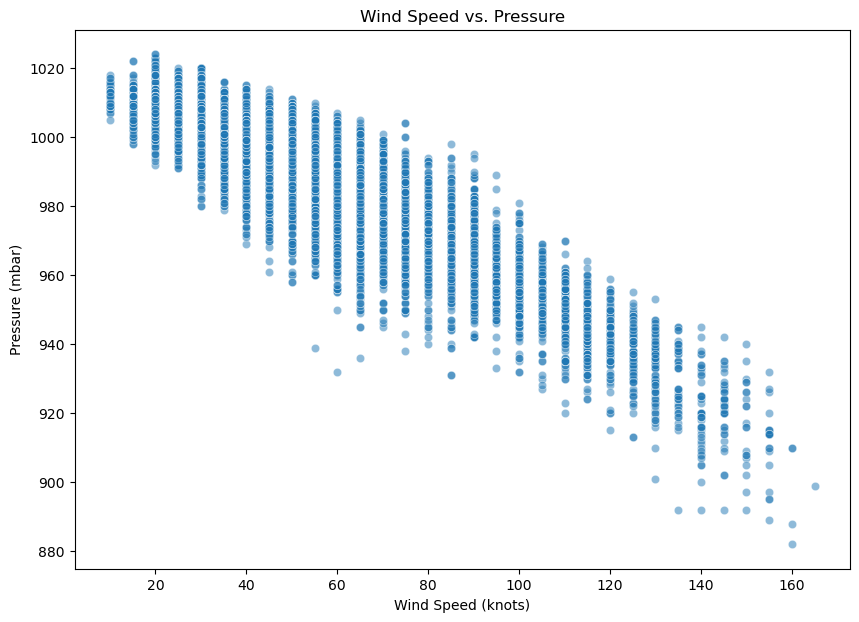

In [105]:
# Scatter plot of Wind Speed vs. Pressure
plt.figure(figsize=(10, 7))
sns.scatterplot(x='wind', y='pressure', data=df, alpha=0.5)
plt.title('Wind Speed vs. Pressure')
plt.xlabel('Wind Speed (knots)')
plt.ylabel('Pressure (mbar)')
plt.show()

In [106]:
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['status', 'category'], drop_first=True)

print("Shape of original dataframe:", df.shape)
print("Shape of encoded dataframe:", df_encoded.shape)

print("\nFirst 5 rows of the new encoded dataframe:")
print(df_encoded.head())

Shape of original dataframe: (22705, 13)
Shape of encoded dataframe: (22705, 24)

First 5 rows of the new encoded dataframe:
       name  year  month  day  hour   lat  long  wind  pressure  \
0  AL011975  1975      6   24    12  32.5 -52.0    20       NaN   
1  AL011975  1975      6   24    18  32.6 -52.6    25       NaN   
2  AL011975  1975      6   25     0  32.7 -53.2    25       NaN   
3  AL011975  1975      6   25    60  32.8 -53.2    25       NaN   
4  AL011975  1975      6   25    12  33.0 -54.5    25       NaN   

   tropicalstorm_force_diameter  ...  status_subtropical depression  \
0                           NaN  ...                          False   
1                           NaN  ...                          False   
2                           NaN  ...                          False   
3                           NaN  ...                          False   
4                           NaN  ...                          False   

   status_subtropical storm  status_tropical 

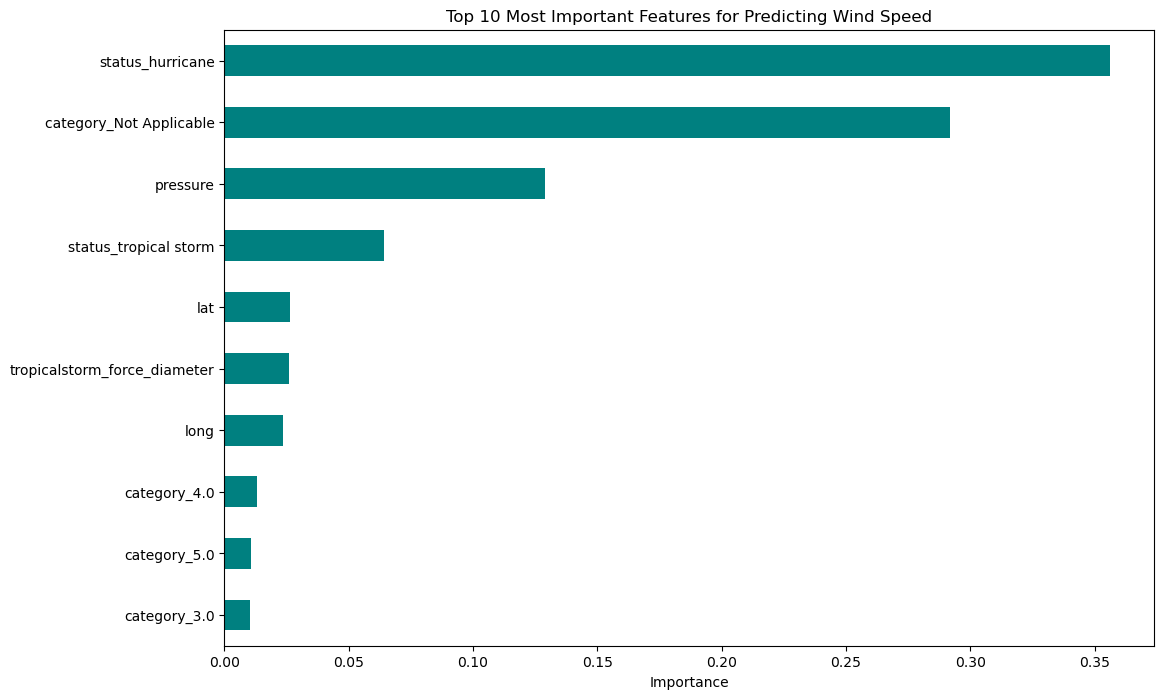

In [107]:


# Define features (X) and target (y)
# We will drop columns that are not useful or are text-based for this model
features = df_encoded.drop(columns=['name', 'wind'])
target = df_encoded['wind']

# A Random Forest model can't handle missing values, so we'll fill any remaining NaNs with 0
features = features.fillna(0)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(features, target)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=features.columns)

# Plot the most important features
plt.figure(figsize=(12, 8))
importances.nlargest(10).sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Most Important Features for Predicting Wind Speed')
plt.xlabel('Importance')
plt.show()